# Funções para geração de resultados

In [2]:
# Gera inputs
varia_filmes = [100, 1000, 10000, 100000, 1000000, 10000000]
varia_categorias = [2, 4, 8, 16, 32, 64]

!g++ -I/usr/local/Cellar/boost/1.75.0/include -L/usr/local/Cellar/boost/1.75.0/lib -lboost_random geradorInputs.cpp -o geradorInputs

for i in varia_filmes:
    for j in varia_categorias:
        !./geradorInputs {i} {j}
        !mv input.txt inputs/in-{i}-{j}.txt

In [3]:
# Gera outputs e mede tempo de execução
import time

files = !ls inputs/

runtime_guloso = {}
runtime_aleatorio = {}

amount_of_films_guloso = {}
amout_of_films_aleatorio = {}

for file in files:
    start_time = time.time()
    !./guloso inputs/{file} > outputs/out-guloso-{file}
    runtime_guloso[file] = time.time() - start_time
    with open(f"outputs/out-guloso-{file}") as f:
        first_line = f.readline().strip('\n')
        amount_of_films_guloso[file] = int(first_line.split(' ')[0])

    start_time = time.time()
    !./aleatorizado inputs/{file} > outputs/out-aleatorio-{file}
    runtime_aleatorio[file] = time.time() - start_time
    with open(f"outputs/out-aleatorio-{file}") as f:
        first_line = f.readline().strip('\n')
        amout_of_films_aleatorio[file] = int(first_line.split(' ')[0])

In [43]:
# Gera arquivo csv com tempos de execução
import csv

with open('outputs/data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['num_filmes','num_categorias', 'runtime_guloso', 'runtime_aleatorizado', 'amount_of_films_guloso', 'amount_of_films_aleatorizado'])
    for input_value in runtime_guloso.keys():
        num_filmes = input_value.split('-')[1]
        num_categorias = input_value.split('-')[2].split('.')[0]
        writer.writerow([num_filmes, num_categorias, runtime_guloso[input_value], runtime_aleatorio[input_value], amount_of_films_guloso[input_value], amout_of_films_aleatorio[input_value]])


In [53]:
import pandas as pd

output_files =  !ls outputs/
output_files = output_files[1:]
df = pd.read_csv("outputs/data.csv")

for file_name in output_files:
    file_info = file_name.split('.')[0].split('-')
    num_movies = int(file_info[3])
    num_categories = int(file_info[4])
    movie_screen_times = []
    if 'aleatorio' in file_name:
        with open(f'outputs/{file_name}', 'r') as f:
            lines = f.readlines()[1:] 
            for line in lines:
                movie_info = line.strip().split(' ')
                start_time = int(movie_info[0])
                end_time = int(movie_info[1])
                screen_time = end_time - start_time
                movie_screen_times.append(screen_time)
        
        row_index = df.index[(df['num_filmes'] == num_movies) & (df['num_categorias'] == num_categories)][0]
        df.loc[row_index, 'screen_time_aleatorio'] = sum(movie_screen_times)
    else:
        with open(f'outputs/{file_name}', 'r') as f:
            lines = f.readlines()[1:] 
            for line in lines:
                movie_info = line.strip().split(' ')
                start_time = int(movie_info[0])
                end_time = int(movie_info[1])
                screen_time = end_time - start_time
                movie_screen_times.append(screen_time)
        
        row_index = df.index[(df['num_filmes'] == num_movies) & (df['num_categorias'] == num_categories)][0]
        df.loc[row_index, 'screen_time_guloso'] = sum(movie_screen_times)

df.to_csv('outputs/data.csv', index=False)

# Gráficos e Tabelas

In [54]:
# Tabela de tempo de execução
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('outputs/data.csv')

df = df.set_index(['num_filmes', 'num_categorias'])

df_runtime = df[['runtime_guloso', 'runtime_aleatorizado']]

df_runtime

runtime_guloso  runtime_aleatorizado
num_filmes num_categorias                                      
10000000   16                    9.567816             10.427446
           2                     6.983550              7.099456
           32                    9.810081             10.710194
           4                     8.211357              7.686642
           64                   11.032710             12.172805
           8                     9.483345              9.755097
1000000    16                    1.073596              1.170937
           2                     0.822229              0.820664
           32                    1.143875              1.221123
           4                     0.879825              0.850475
           64                    1.179914              1.294760
           8                     1.085309              1.152024
100000     16                    0.326444              0.331458
           2                     0.310207              0.296708
           32                    0.320990              0.343632
           4                     0.294250              0.305080
           64                    0.336143              0.338787
           8                     0.321957              0.329683
10000      16                    0.223153              0.257990
           2                     0.241265              0.253303
           32                    0.257402              0.273841
           4                     0.272439              0.241867
           64                    0.241367              0.270703
           8                     0.259660              0.266083
1000       16                    0.253526              0.251504
           2                     0.225245              0.242167
           32                    0.227341              0.249723
           4                     0.250222              0.310034
           64                    0.274353              0.253531
           8                     0.244991              0.261563
100        16                    0.245917              0.243898
           2                     0.253868              0.245338
           32                    0.246490              0.247296
           4                     0.248735              0.247809
           64                    0.235465              0.243284
           8                     0.248876              0.255934

In [55]:
# Tabela de quantidade de filmes
df_filmes = df[['amount_of_films_guloso', 'amount_of_films_aleatorizado']]
df_filmes

amount_of_films_guloso  \
num_filmes num_categorias                           
10000000   16                                  23   
           2                                    2   
           32                                  23   
           4                                    8   
           64                                  23   
           8                                   23   
1000000    16                                  23   
           2                                    3   
           32                                  23   
           4                                   11   
           64                                  23   
           8                                   23   
100000     16                                  23   
           2                                    4   
           32                                  23   
           4                                   12   
           64                                  23   
           8                                   23   
10000      16                                  23   
           2                                    2   
           32                                  23   
           4                                   11   
           64                                  23   
           8                                   23   
1000       16                                  22   
           2                                    2   
           32                                  22   
           4                                   13   
           64                                  23   
           8                                   22   
100        16                                  12   
           2                                    3   
           32                                  12   
           4                                   10   
           64                                  10   
           8                                   11   

                           amount_of_films_aleatorizado  
num_filmes num_categorias                                
10000000   16                                        11  
           2                                          2  
           32                                        11  
           4                                          8  
           64                                        12  
           8                                         12  
1000000    16                                        13  
           2                                          3  
           32                                        12  
           4                                         11  
           64                                        12  
           8                                         13  
100000     16                                        11  
           2                                          4  
           32                                        11  
           4                                         12  
           64                                        11  
           8                                          9  
10000      16                                        12  
           2                                          2  
           32                                        13  
           4                                         10  
           64                                        12  
           8                                         14  
1000       16                                        10  
           2                                          2  
           32                                        14  
           4                                         10  
           64                                        13  
           8                                         10  
100        16                                        11  
           2                                          3  
           32                           

In [56]:
# Tabela de tempo de exibição
df_screen_time = df[['screen_time_guloso', 'screen_time_aleatorio']]
df_screen_time

screen_time_guloso  screen_time_aleatorio
num_filmes num_categorias                                           
10000000   16                            23.0                   23.0
           2                              2.0                    6.0
           32                            23.0                   23.0
           4                              8.0                   17.0
           64                            23.0                   23.0
           8                             23.0                   23.0
1000000    16                            23.0                   23.0
           2                              3.0                   12.0
           32                            23.0                   23.0
           4                             11.0                   23.0
           64                            23.0                   23.0
           8                             23.0                   23.0
100000     16                            23.0                   23.0
           2                              4.0                   11.0
           32                            23.0                   23.0
           4                             12.0                   20.0
           64                            23.0                   23.0
           8                             23.0                   23.0
10000      16                            23.0                   23.0
           2                              2.0                    4.0
           32                            23.0                   23.0
           4                             11.0                   23.0
           64                            23.0                   23.0
           8                             23.0                   23.0
1000       16                            23.0                   23.0
           2                              3.0                    3.0
           32                            22.0                   23.0
           4                             15.0                   22.0
           64                            23.0                   23.0
           8                             23.0                   23.0
100        16                            21.0                   22.0
           2                              5.0                    5.0
           32                            18.0                   20.0
           4                             17.0                   18.0
           64                            23.0                   17.0
           8                             21.0                   21.0

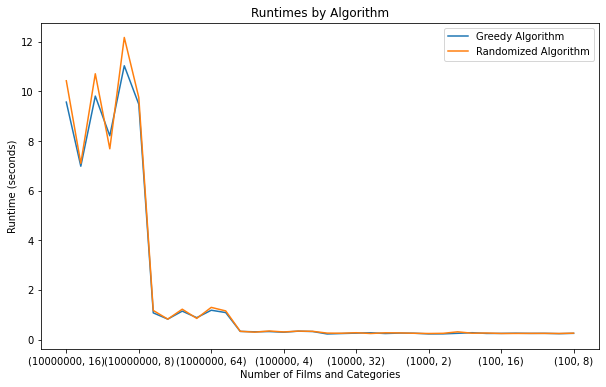

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
df_runtime['runtime_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_runtime['runtime_aleatorizado'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtimes by Algorithm')
ax.legend()
plt.show()

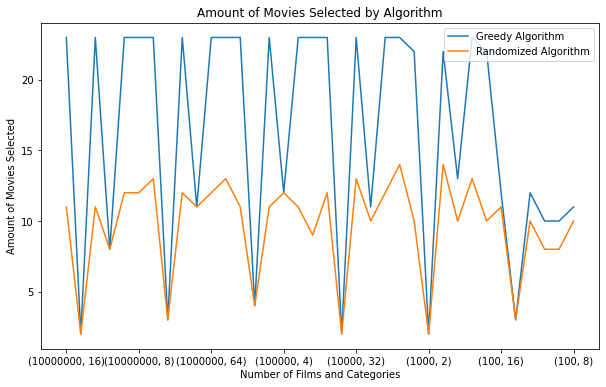

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
df_filmes['amount_of_films_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_filmes['amount_of_films_aleatorizado'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Amount of Movies Selected')
ax.set_title('Amount of Movies Selected by Algorithm')
ax.legend()
plt.show()

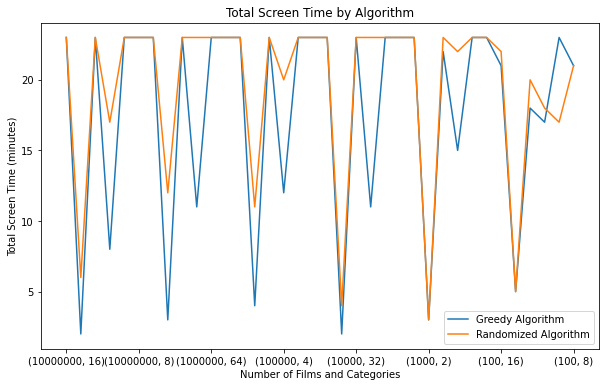

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
df_screen_time['screen_time_guloso'].plot(ax=ax, label='Greedy Algorithm')
df_screen_time['screen_time_aleatorio'].plot(ax=ax, label='Randomized Algorithm')
ax.set_xlabel('Number of Films and Categories')
ax.set_ylabel('Total Screen Time (minutes)')
ax.set_title('Total Screen Time by Algorithm')
ax.legend()
plt.show()

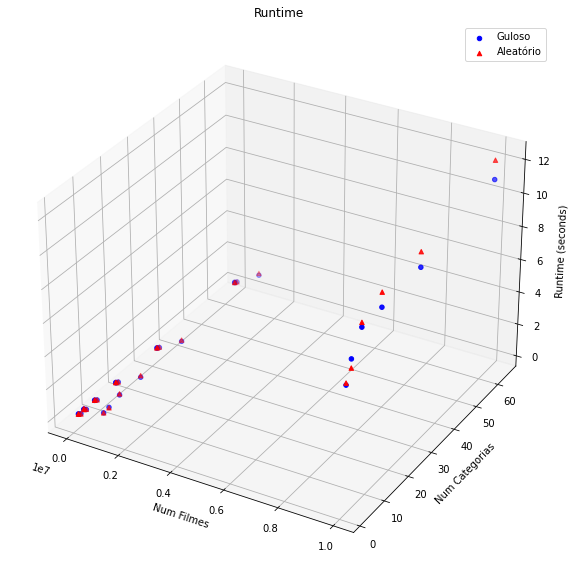

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_runtime.index.get_level_values(0)
y = df_runtime.index.get_level_values(1)
z_guloso = df_runtime['runtime_guloso']
z_aleatorio = df_runtime['runtime_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Aleatório')
ax.set_xlabel('Num Filmes')
ax.set_ylabel('Num Categorias')
ax.set_zlabel('Runtime (seconds)')
ax.legend()
plt.title('Runtime')
plt.show()

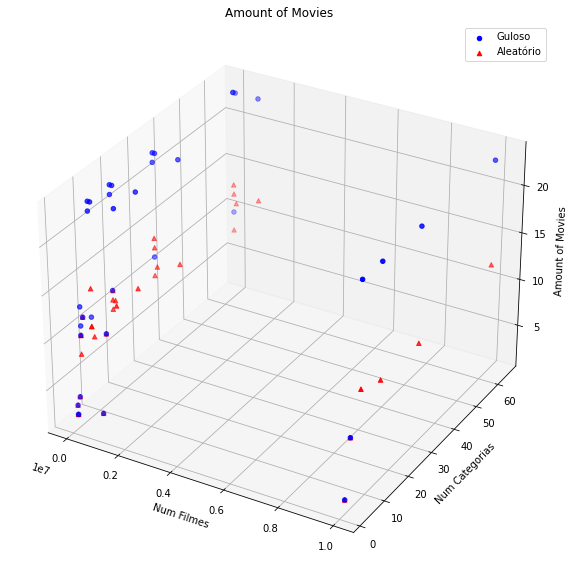

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_filmes.index.get_level_values(0)
y = df_filmes.index.get_level_values(1)
z_guloso = df_filmes['amount_of_films_guloso']
z_aleatorio = df_filmes['amount_of_films_aleatorizado']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Aleatório')
ax.set_xlabel('Num Filmes')
ax.set_ylabel('Num Categorias')
ax.set_zlabel('Amount of Movies')
ax.legend()
plt.title('Amount of Movies')
plt.show()

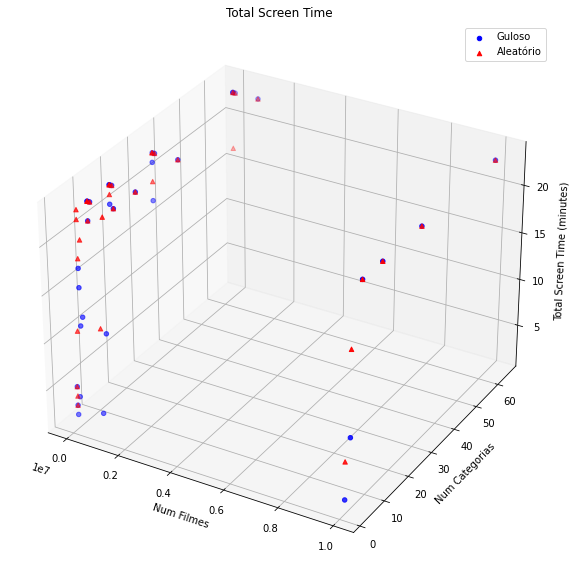

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = df_screen_time.index.get_level_values(0)
y = df_screen_time.index.get_level_values(1)
z_guloso = df_screen_time['screen_time_guloso']
z_aleatorio = df_screen_time['screen_time_aleatorio']
ax.scatter(x, y, z_guloso, c='blue', marker='o', label='Guloso')
ax.scatter(x, y, z_aleatorio, c='red', marker='^', label='Aleatório')
ax.set_xlabel('Num Filmes')
ax.set_ylabel('Num Categorias')
ax.set_zlabel('Total Screen Time (minutes)')
ax.legend()
plt.title('Total Screen Time')
plt.show()

# Valgrind

In [1]:
!g++ -Wall -O3 -g guloso.cpp -o guloso
!g++ -Wall -O3 -g aleatorizado.cpp -o aleatorizado

guloso.cpp: In function ‘std::vector<movie> chooseMovies(std::vector<movie>&, std::vector<int>&)’:
guloso.cpp:69:23: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<movie>::size_type’ {aka ‘long unsigned int’} []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wsign-compare-Wsign-compare]8;;]
   69 |     for (int i = 0; i < movies.size(); i++) {
      |                     ~~^~~~~~~~~~~~~~~
guloso.cpp: In function ‘int main(int, char**)’:
guloso.cpp:129:23: warning: comparison of integer expressions of different signedness: ‘int’ and ‘std::vector<movie>::size_type’ {aka ‘long unsigned int’} []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wsign-compare-Wsign-compare]8;;]
  129 |     for (int i = 0; i < chosenMovies.size(); i++) {
      |                     ~~^~~~~~~~~~~~~~~~~~~~~
aleatorizado.cpp: In function ‘std::vector<movie> chooseMovies(std::vector<movie>&, std::vector<int>&)’:
aleatorizado.cpp:8

In [2]:
!valgrind --tool=callgrind ./guloso inputs/in-1000-32.txt

==446428== Callgrind, a call-graph generating cache profiler
==446428== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==446428== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==446428== Command: ./guloso inputs/in-1000-32.txt
==446428== 
==446428== For interactive control, run 'callgrind_control -h'.
22
0 1 20
1 2 25
2 3 24
3 4 11
4 5 28
5 6 25
6 7 27
7 8 7
8 9 19
9 10 14
10 11 31
11 12 29
12 13 28
13 14 20
14 15 18
15 16 29
16 17 12
18 19 8
19 20 4
20 21 31
21 22 7
22 23 16
==446428== 
==446428== Events    : Ir
==446428== Collected : 4830162
==446428== 
==446428== I   refs:      4,830,162


In [3]:
!callgrind_annotate callgrind.out.446428 guloso.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.446428' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 862880
Trigger: Program termination
Profiled target:  ./guloso inputs/in-1000-32.txt (PID 446428, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   guloso.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
4,830,162 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                  file:function
--------------------------------------------------------------------------------
1,407,552 (29.14%)  /usr/src/debug/

In [4]:
!valgrind --tool=callgrind ./aleatorizado inputs/in-1000-32.txt

==446770== Callgrind, a call-graph generating cache profiler
==446770== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==446770== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==446770== Command: ./aleatorizado inputs/in-1000-32.txt
==446770== 
==446770== For interactive control, run 'callgrind_control -h'.
14
0 1 20
1 2 25
2 3 24
3 4 11
4 5 28
5 6 19
6 7 27
7 8 9
8 11 11
11 13 1
13 17 5
17 19 3
19 22 4
22 23 16
==446770== 
==446770== Events    : Ir
==446770== Collected : 4872439
==446770== 
==446770== I   refs:      4,872,439


In [5]:
!callgrind_annotate callgrind.out.446770 aleatorizado.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.446770' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 866752
Trigger: Program termination
Profiled target:  ./aleatorizado inputs/in-1000-32.txt (PID 446770, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatorizado.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
4,872,439 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                  file:function
--------------------------------------------------------------------------------
1,407,820 (28.89%)  /us